In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [4]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
df_input = pd.read_csv("CD_OA_std", usecols=[1,2,3,4,5,6,7])

In [6]:
df_output = pd. read_csv("CD_OA", usecols=[8])

In [7]:
df_input.shape

(351, 7)

In [8]:
df_output.shape

(351, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [10]:
print(x_train.shape,x_test.shape)

(315, 7) (36, 7)


In [11]:
x_train

,V_cell,P_b,T_cell,stoichi_anode,stoichi_cathode,W_ch,D_ch
76,-1.336306,0.000040,-1.224745e+00,0.000000,1.224745,-1.069045,-0.267261
198,0.801784,0.000040,-1.392374e-14,1.224745,-1.224745,-0.267261,1.336306
171,1.069045,-1.224765,-1.392374e-14,0.000000,0.000000,-0.267261,-0.267261
20,-0.267261,-1.224765,-1.392374e-14,0.000000,0.000000,-1.069045,-1.069045
281,-0.534522,1.224725,1.224745e+00,0.000000,-1.224745,1.336306,-0.267261
...,...,...,...,...,...,...,...
323,-1.336306,-1.224765,-1.224745e+00,-1.224745,-1.224745,1.336306,1.336306
192,-1.069045,-1.224765,1.224745e+00,1.224745,1.224745,-0.267261,-0.267261
117,1.603567,1.224725,1.224745e+00,0.000000,-1.224745,-0.267261,-1.069045
47,-0.534522,0.000040,-1.392374e-14,1.224745,-1.224745,-1.069045,-0.267261


In [12]:
y_train

,i_ave
76,6357.860611
198,659.208170
171,187.579905
20,2998.328011
281,5424.794499
...,...
323,5403.622146
192,3090.050343
117,91.491481
47,4334.846625


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(7,), activation='relu'))  
model.add(Dense(units=10, activation='relu'))  #
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_absolute_error',    
              optimizer='adam',             #とりあえずadamで
              metrics=['mae'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [14]:
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mae",
                                              patience=20,
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])

Epoch 1/20000
2/2 [==============================] - 1s 214ms/step - loss: 3073.0322 - mae: 3073.0322 - val_loss: 3350.5420 - val_mae: 3350.5420 - lr: 0.0010
Epoch 2/20000
2/2 [==============================] - 0s 22ms/step - loss: 3072.9912 - mae: 3072.9912 - val_loss: 3350.4998 - val_mae: 3350.4998 - lr: 0.0010
Epoch 3/20000
2/2 [==============================] - 0s 28ms/step - loss: 3072.9487 - mae: 3072.9487 - val_loss: 3350.4565 - val_mae: 3350.4565 - lr: 0.0010
Epoch 4/20000
2/2 [==============================] - 0s 31ms/step - loss: 3072.9062 - mae: 3072.9062 - val_loss: 3350.4116 - val_mae: 3350.4116 - lr: 0.0010
Epoch 5/20000
2/2 [==============================] - 0s 16ms/step - loss: 3072.8621 - mae: 3072.8621 - val_loss: 3350.3640 - val_mae: 3350.3640 - lr: 0.0010
Epoch 6/20000
2/2 [==============================] - 0s 60ms/step - loss: 3072.8164 - mae: 3072.8164 - val_loss: 3350.3147 - val_mae: 3350.3147 - lr: 0.0010
Epoch 7/20000
2/2 [==============================] - 0s 3

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

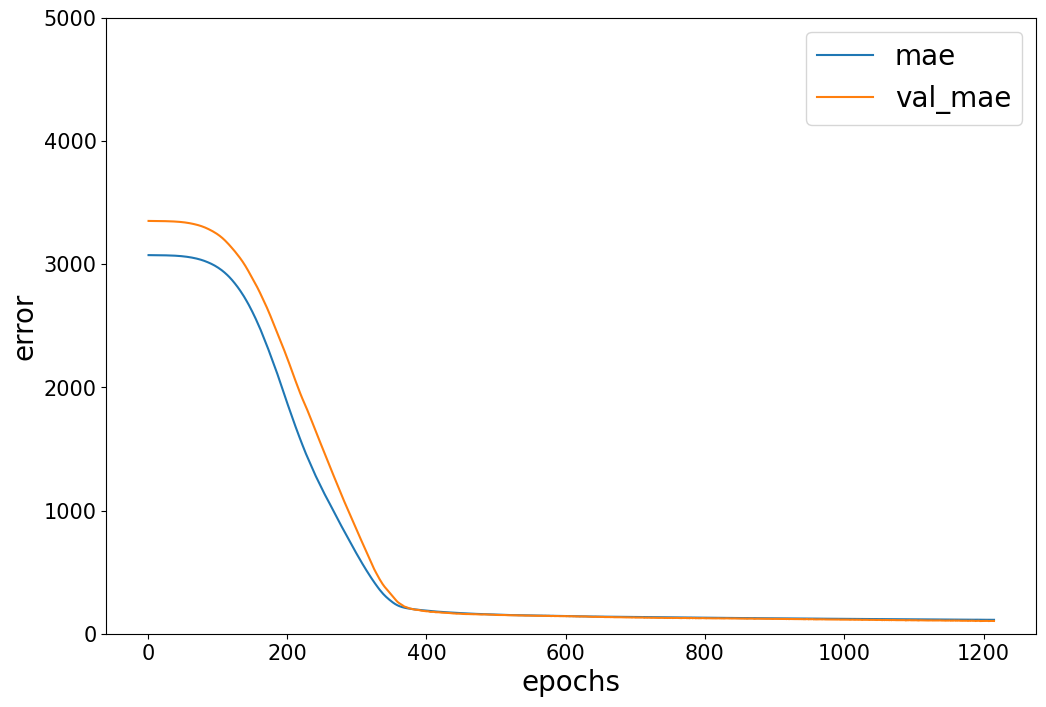

In [16]:
mae = history_dict['mae']
val_mse = history_dict['val_mae']
epochs = range(1, len(mae) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mae, label='mae')
plt.plot(epochs, val_mse, label='val_mae')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,5000))
plt.legend(loc = 'best',fontsize=20)
#plt.savefig('mae_transition.png')
plt.show()

In [20]:
import tensorflow as tf

# MAPEを計算する関数を定義
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # ゼロで割ることを避けるための小さな値
    percentage_error = tf.abs((y_true - y_pred) / (tf.maximum(tf.abs(y_true), epsilon)))
    mape = tf.reduce_mean(percentage_error) * 100.0
    return mape

df7 = model.predict(df_input)
# MAPEを計算
df7 = pd.DataFrame(df7)
df8 = pd.concat([pd.DataFrame(df_output),df7], axis=1)

y_true = tf.constant(df8.iloc[:, 0].values, dtype=tf.float32)
y_pred = tf.constant(df8.iloc[:, 1].values, dtype=tf.float32)
mape_value = mean_absolute_percentage_error(y_true,y_pred)

# 結果を表示
print(f"MAPE: {mape_value.numpy()}%")

11/11 [==============================] - 0s 435us/step
MAPE: 15.713617324829102%


In [18]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [19]:
model.save('i_predict CD_OA')

INFO:tensorflow:Assets written to: i_predict CD_OA\assets
